**IMPLEMENTASI REGRESI**

---
Menggunakan Metode Linear dan Metode Pangkat Sederhana

Annisa Charisma Wijayanti - 211201221140086

## **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## **INPUT DATASET**

In [36]:
data = pd.read_csv('Student_Performance.csv')

In [ ]:
NL = data['Sample Question Papers Practiced'].values
NT = data['Performance Index'].values

## **IMPLEMENTASI KEDUA METODE**

In [ ]:
valid_idx = ~np.isnan(NL) & ~np.isnan(NT) & ~np.isinf(NL) & ~np.isinf(NT) & (NL > 0)
NL = NL[valid_idx].reshape(-1, 1)
NT = NT[valid_idx]

In [ ]:
# Metode 1: Model Linear
linear_model = LinearRegression()
linear_model.fit(NL, NT)
NT_pred_linear = linear_model.predict(NL)

In [ ]:
# Metode 2: Model Pangkat Sederhana
# y = ax^b => log(y) = log(a) + b*log(x)
NL_log = np.log(NL)
NT_log = np.log(NT)
linear_model_pangkat = LinearRegression()
linear_model_pangkat.fit(NL_log, NT_log)
a_pangkat = np.exp(linear_model_pangkat.intercept_)
b_pangkat = linear_model_pangkat.coef_[0]
NT_pred_pangkat = a_pangkat * NL**b_pangkat

## **GALAT RMS**

In [ ]:
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
rms_pangkat = np.sqrt(mean_squared_error(NT, NT_pred_pangkat))

## **HASIL**

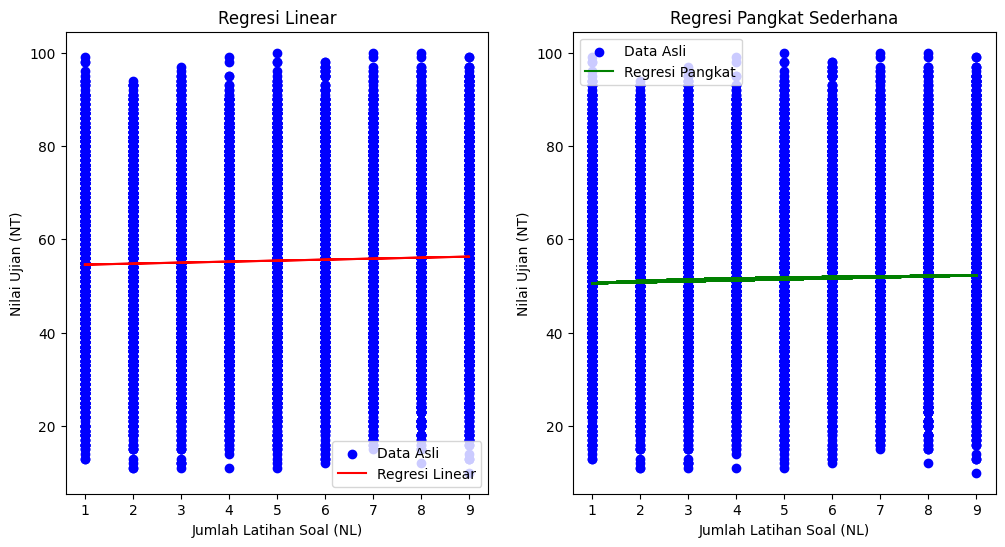

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(NL, NT, color='blue', label='Data Asli')
plt.plot(NL, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(NL, NT, color='blue', label='Data Asli')
plt.plot(NL, NT_pred_pangkat, color='green', label='Regresi Pangkat')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Pangkat Sederhana')
plt.legend()

plt.show()

In [34]:
print(f"RMS Metode Linear: {rms_linear}")
print(f"RMS Metode Pangkat Sederhana: {rms_pangkat}")

RMS Metode Linear: 19.196567736370024
RMS Metode Pangkat Sederhana: 19.565035257712687
